# Table of Contents
* [1. Curve Fitting - Part 1](#1.-Curve-Fitting---Part-1)
	* [1.1 Cental Question](#1.1-Cental-Question)
	* [1.2 Background](#1.2-Background)
		* [1.2.1 Emperical Modeling](#1.2.1-Emperical-Modeling)
	* [1.3 Review](#1.3-Review)
	* [1.4 Using a Python function to compute a mathematical function](#1.4-Using-a-Python-function-to-compute-a-mathematical-function)
	* [1.5 Fitting data manually](#1.5-Fitting-data-manually)
		* [1.5.1 Exercise 1](#1.5.1-Exercise-1)
	* [1.6 Fitting data numerically](#1.6-Fitting-data-numerically)
		* [1.6.1 Exercise 2](#1.6.1-Exercise-2)
		* [1.6.2 Exercise 3](#1.6.2-Exercise-3)
		* [1.6.3 Exercise 4](#1.6.3-Exercise-4)
	* [1.7 Fitting an exponential decay](#1.7-Fitting-an-exponential-decay)
		* [1.7.1 Discharging Capacitor](#1.7.1-Discharging-Capacitor)
	* [1.8 Fitting any function](#1.8-Fitting-any-function)
		* [1.8.1 What to do when `curve_fit()` fails](#1.8.1-What-to-do-when-curve_fit%28%29-fails)
		* [1.8.2 Exercise 5](#1.8.2-Exercise-5)
		* [1.8.3 Exercise 6](#1.8.3-Exercise-6)


# 1. Curve Fitting - Part 1

## 1.1 Cental Question

How do I find the best-fit curve for a set of data and how do I describe the relationship with a mathematical function?

## 1.2 Background

You should read Module 8.3 Emperical Models in the second edition of *Introduction to Computational Science* by A. Shiflet and G. Shiflet.

### 1.2.1 Emperical Modeling

Data may be described by a *mathematical function*. Finding the best-fit function and *parameters* for a set of data is called *curve fitting*. In general, using a function generated from curve fitting in order to describe some process, whether it is physical, biological, social, economical, etc., is called *emperical modeling.*

Shiflet and Shiflet, in *Introduction to Computational Science*, say, "An **emperical model** is based only on data and is used to predict, not explain a system. An emperical model consists of a function that captures the trend of the data." (Boldfaced font is included in the quote.)

## 1.3 Review

In the last lesson, you learned how to plot a mathematical function by creating an array of points for the independent variable and using the mathematical function to calculate the corresponding points for the dependent variable.

Here is an example of creating points and plotting a function for the voltage as a function of time from $t=0$ to $t=4$ s in a particular experiment. The mathematical function is:

$$V = -10 + 5t$$

When fitting a curve to data, the constants, $-10$ and $5$ in this case, are called the *fit parameters*.

In [1]:
#import packages used in the lesson
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

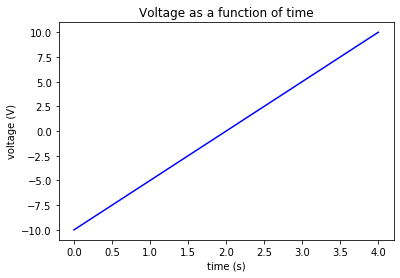

In [2]:
#create an array of values for time
tarray = np.linspace(0,4,)

#create an array of values for x
Varray = -10 + 5*tarray

fig=plt.figure()
plt.title("Voltage as a function of time")
plt.plot(tarray, Varray, 'b-')
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

## 1.4 Using a Python function to compute a mathematical function

For curve fitting, we will need to define a Python function that takes an array for the independent variable and the constants and returns an array for the dependent variable. It is helpful to think of every mathematical function in *generic* terms. For instance, we can write a linear function for $y(x)$ as

$$y = a_0 + a_1x$$

where $a_0$ and $a_1$ are constants (i.e. *fit parameters*).

Here is a function called `linear` that takes the variables `xarray`, `a_0`, `a_1` and returns `yarray`.

In [3]:
def linear(xarray, a_0, a_1):
    yarray = a_0 + a_1*xarray
    return yarray

We'll use the same data we used before for plotting voltage as a function of time from $t=0$ to $t=4$ s in a particular experiment with the constants $a_0=5$ and $a_1=-10$. However, we'll use our function to calculate the voltage array.

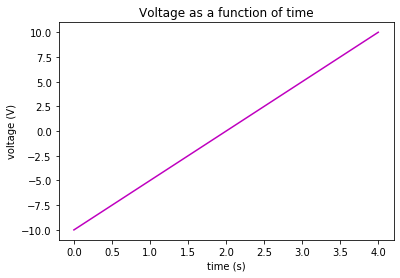

In [4]:
#create an array of values for time
tarray = np.linspace(0,4,)

#call the linear() function to compute the voltage
Varray = linear(tarray, -10, 5)

fig=plt.figure()
plt.title("Voltage as a function of time")
plt.plot(tarray, Varray, 'm-')
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

## 1.5 Fitting data manually

In this experiment, a ball rolls on a track with constant velocity.

![](uniform-motion-ball-fast-main.gif)

The x-position of the ball is measured at the times indicated by red markers in the animated gif. The data for x-position and time are in the file `x-t-ball.txt`.

Read in the data using pandas.

In [5]:
df = pd.read_csv('x-t-ball.txt', sep='\t')
df.head()

,time (s),x-position (m)
0,0.000,-0.803
1,0.334,-0.629
2,0.667,-0.454
3,1.001,-0.273
4,1.335,-0.102


Plot the data.

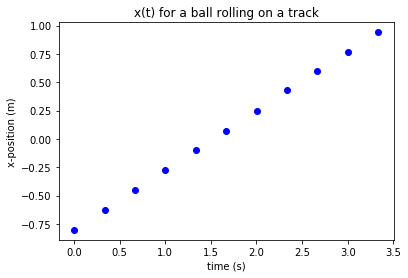

In [6]:
tdata = df['time (s)']
xdata = df['x-position (m)']

fig = plt.figure()
plt.title("x(t) for a ball rolling on a track")
plt.plot(tdata, xdata, 'bo')
plt.xlabel('time (s)')
plt.ylabel('x-position (m)')
plt.show()

Note that this data looks linear. But we don't know the values of the constants (fit parameters). Let's create the constants and adjust them until our line fits the data.

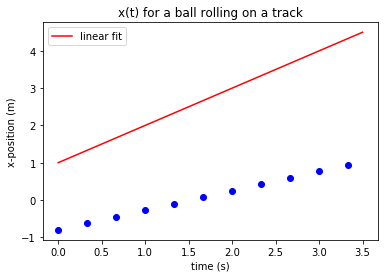

In [7]:
# define constants and create points for a linear function
a_0 = 1
a_1 = 1
tarray = np.linspace(0,3.5,100)
xarray = linear(tarray, a_0, a_1)

# get data from dataframe
tdata = df['time (s)']
xdata = df['x-position (m)']

# plot data and our linear function on the same axes
fig = plt.figure()
plt.title("x(t) for a ball rolling on a track")
plt.plot(tdata, xdata, 'bo')
plt.plot(tarray, xarray, 'r-', label='linear fit')
plt.xlabel('time (s)')
plt.ylabel('x-position (m)')
plt.legend()
plt.show()

Note that the the linear function does not go through the data. Adjust the fit parameters `a_0` and `a_1` and re-run the cell until the linear function goes through the data as closely as possible. It should look like this.

<img src="x-t-ball-best-fit.png" width=400>

### 1.5.1 Exercise 1

Chemists use Beer's Law to measure concentration of a solution based on its absorbance of light. (Read [this brief tutorial](http://www.chem.ucla.edu/~harding/IGOC/B/beers_law.html) that includes photos as a demonstration of the principle.) 

Read the file `absorbance-grape.txt` and plot the absorbance (in arbitrary units) vs. concentration in grams per liter. Manually find the parameters for a linear curve fit. (Data is from Dr. Pam Knippenburg, HPU Department of Chemistry.)

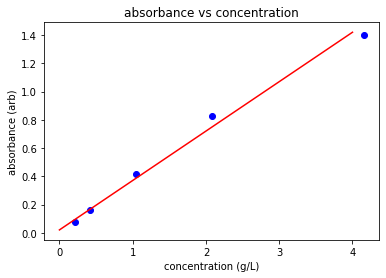

In [8]:
### BEGIN SOLUTION
# read the data file
df = pd.read_csv('absorbance-grape.txt', sep='\t')
df.head()

# assign variable names to the columns of data; these variables are lists
c_data = df['concentration (g/L)']
abs_data = df['absorbance (arb)']

# define variables for the best-fit parameters
a0 = 0.02
a1 = 0.35

# create arrays of values using the linear() function and the best-fit parameters
c_array = np.linspace(0,4,100)
abs_array = linear(c_array, a0, a1)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("absorbance vs concentration")
plt.plot(c_data, abs_data, 'bo')
plt.plot(c_array, abs_array, 'r-')
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.show()

### END SOLUTION

## 1.6 Fitting data numerically

Python can use an algorithm to compute the best-fit parameters for a given mathematical function. As you can imagine, this is better than "eyeballing" it.

First, we need to import a package with functions that do the curve fit.

In [9]:
from scipy.optimize import curve_fit #used for curve fitting

Next, let's plot our position-time data for the rolling ball. It's best to first view the data to see what kind of function might fit the data. This data looks linear.

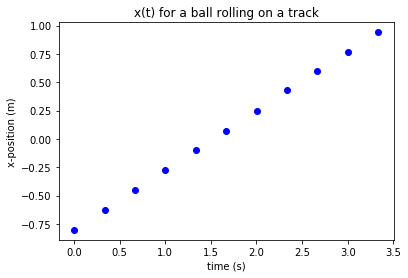

In [11]:
# read data again, just in case
df = pd.read_csv('x-t-ball.txt', sep='\t')
df.head()

# get data from dataframe
tdata = df['time (s)']
xdata = df['x-position (m)']

# plot data and our linear function on the same axes
fig = plt.figure()
plt.title("x(t) for a ball rolling on a track")
plt.plot(tdata, xdata, 'bo')
plt.xlabel('time (s)')
plt.ylabel('x-position (m)')
plt.show()

The goal is to find the constants $a_0$ and $a_1$ for the linear function that best describes our data. Then,

$$x = a_0 + a_1t$$

where $t$ is in seconds and $x$ is in meters.

Remember that we already defined a Python function `linear(xdata, a_0, a_1)` that takes an array for the independent variable along with the constants `a_0` and `a_1` and returns an array for the dependent variable. Since it was defined above, you don't have to define it again. But for the same of clarity, let's define it again.

In [12]:
def linear(xarray, a_0, a_1):
    yarray = a_0 + a_1*xarray
    return yarray

Now we will call the `curve_fit` function in the scipy package to do our curve fit for us and return the parameters of the best-fit curve. The `curve_fit` function takes as its arguments:

- the name of our Python function that takes an array of independent variable data and returns the dependent variable values from our mathematical model
- the array of measured independent variable data
- the array of measured dependent variable data

The `curve_fit` function uses an algorithm to compute the parameters of the best-fit function. Although we can look up the details of the algorithm, we can benefit from using the function without knowing the details of the algorithm. (When we don't know the details of how it works, we sometimes call it at **black box**.)


In [13]:
# the curve_fit() function will return the fit parameters along with statistics
parameters, stats = curve_fit(linear, tdata, xdata)

# parameters is a list of best-fit values for the parameters of the mathematical model we are using
# the first item [0] is the first constant
# the second item [1] is the second constant, etc.
a0_best=parameters[0] #a_0
a1_best=parameters[1] #a_1

print("The best fit parameters are: a_0=",a0_best," and a_1=",a1_best)

The best fit parameters are: a_0= -0.8015907480356694  and a_1= 0.5244386567345447


You should compare these values to what you found manually. How close was your "eyeball" measurement?

Now, we want to plot the best-fit linear function using the best-fit linear parameters. So call our function `linear()` using the best-fit parameters and an array of values for the independent variable.

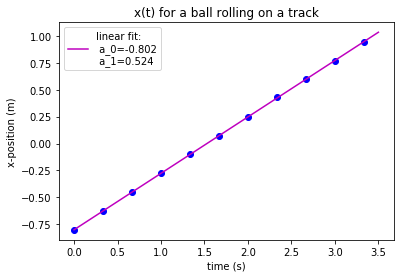

In [14]:
# create points for the best-fit function using the best-fit parameters
tarray = np.linspace(0,3.5,100)
xarray = linear(tarray, a0_best, a1_best)

# get data from dataframe
tdata = df['time (s)']
xdata = df['x-position (m)']

# plot data and our linear function on the same axes
fig = plt.figure()
plt.title("x(t) for a ball rolling on a track")
plt.plot(tdata, xdata, 'bo')
plt.plot(tarray, xarray, 'm-', label='linear fit:\n a_0={:.3f}\n a_1={:.3f}'.format(a0_best, a1_best))
plt.xlabel('time (s)')
plt.ylabel('x-position (m)')
plt.legend()
plt.show()

### 1.6.1 Exercise 2

In Exercise 1, you manually fit a linear function to absorbance data for a Beer's Law experiment. In this exercise, use Python to find and plot the best-fit curve. 

Read the file `absorbance-grape.txt` and plot the absorbance (in arbitrary units) vs. concentration in grams per liter. Use the `curve_fit` function to find the parameters for a linear curve fit. Plot the best-fit function and the data on the same graph.

The best fit parameters are: a_0= 0.04710116268470077  and a_1= 0.3364536642894845


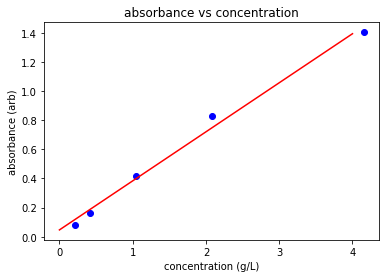

In [15]:
### BEGIN SOLUTION
# read the data file
df = pd.read_csv('absorbance-grape.txt', sep='\t')
df.head()

# assign variable names to the columns of data; these variables are lists
c_data = df['concentration (g/L)']
abs_data = df['absorbance (arb)']

# the curve_fit() function will return the fit parameters along with statistics
parameters, stats = curve_fit(linear, c_data, abs_data)

# best fit parameters
a0_best=parameters[0] #a_0
a1_best=parameters[1] #a_1

print("The best fit parameters are: a_0=",a0_best," and a_1=",a1_best)

# create arrays of values using the linear() function and the best-fit parameters
c_array = np.linspace(0,4,100)
abs_array = linear(c_array, a0_best, a1_best)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("absorbance vs concentration")
plt.plot(c_data, abs_data, 'bo')
plt.plot(c_array, abs_array, 'r-')
plt.xlabel('concentration (g/L)')
plt.ylabel('absorbance (arb)')
plt.show()

### END SOLUTION

### 1.6.2 Exercise 3

Find and plot the best-fit function for brain weight vs. body weight of various mammals. Data is in the file `brain-weight-body-height.txt`. ([data source](https://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt))

The best fit parameters are: a_0= -12.560537026957919  and a_1= 0.6424810086880239


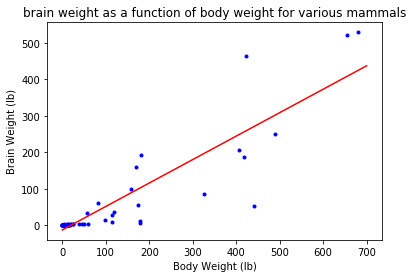

In [26]:
### BEGIN SOLUTION
# read the data file
df = pd.read_csv('brain-weight-body-height.txt', sep='\t')
df.head()

# assign variable names to the columns of data; these variables are lists
bodyweight_data = df['Body Weight (lbs)']
brainweight_data = df['Brain Weight (lbs)']

# the curve_fit() function will return the fit parameters along with statistics
parameters, stats = curve_fit(linear, bodyweight_data, brainweight_data)

# best fit parameters
a0_best=parameters[0] #a_0
a1_best=parameters[1] #a_1

print("The best fit parameters are: a_0=",a0_best," and a_1=",a1_best)

# create arrays of values using the linear() function and the best-fit parameters
body_array = np.linspace(0,700,1000)
brain_array = linear(body_array, a0_best, a1_best)

# plot data and the best-fit function on the same graph
fig = plt.figure()
plt.title("brain weight as a function of body weight for various mammals")
plt.plot(bodyweight_data, brainweight_data, 'b.')
plt.plot(body_array, brain_array, 'r-')
plt.xlabel('Body Weight (lb)')
plt.ylabel('Brain Weight (lb)')
plt.show()

### END SOLUTION

### 1.6.3 Exercise 4

Bryce Smith computed data on points scored and average starting field position for all NFL teams for all games in the 2019 season. Starting field position is measured from the opponent's goalline in yards. So 1 yd means the team obtained the ball and started on the opponent's 1 yard line and only has to gain one yard to score a touchdown. A starting field position of 99 yards means the team started on their own 1 yard line.

The idea is that the smaller your average starting field position (i.e. closer to the opponent's goalline), the more points you will score. Let's see.

Find the best-fit linear function for the data in the file `football-field-pos.txt`.

How many points would a team score if their average starting field position was nearly zero?

## 1.7 Fitting an exponential decay

### 1.7.1 Discharging Capacitor

A capacitor stores electrical potential energy by having oppositely charged parallel plates. Like a battery, there is a voltage across the capacitor. When the capacitor is connected to a resistor, the voltage decreases as a function of time. (In contrast, a battery maintains a constant voltage for a fairly long time when it is connected to a resistor.)

In this experiment, an initially charged capacitor is connected to a resistor, like a light bulb. At $t=0$, the circuit is connected, and a voltmeter is used to measure the voltage across the capacitor at 10 s intervals.

![](discharging-capacitor.png)

Data for the voltage as a function of time is in the file `discharging-capacitor.txt`. Let's read and plot the data.

In [ ]:
df = pd.read_table('discharging-capacitor.txt')
df.head()

In [ ]:
t_data = df['t (min)']
V_data = df['V (volt)']

plt.title('Voltage across a discharging capacitor')
plt.xlabel('t (min)')
plt.ylabel('V (volt)')
plt.plot(t_data,V_data,'bo')
plt.show()

When we look at this data, we might think "Aha! This looks like exponential decay." But we don't know it's exponential decay unless we do a curve fit. Also, a curve fit can give us the parameters for the best-fit function if indeed it is exponential decay as we expect.

A general exponential function $y(x)$ has the form

$$y=y_0e^{-rx}$$

where $y$ is the dependent variable, x is the independent variable, $r$ is the decay constant, and $y_0$ is the value of $y$ at $x=0$--this is called the initial value of y.

We will begin by creating a Python function that takes an array of independent values called `xarray` and constants `y_0` and `r` and calculates the corresponding dependent values $y$ using a mathematical function or *model*, $y(x)$ which is in this case an exponential.

In [ ]:
#this function takes an array of x values and returns an array of y values
#  where y = y_0 * exp(-r*x)
def exp_decay(xarray, y_0, r):
    yarray = y_0*np.exp(-r*xarray)
    return yarray

Now call the `curve_fit()` function and pass it our Python function for the exponential decay along with our capacitor data.

In [ ]:
# the curve_fit() function will return the fit parameters along with statistics
parameters, stats = curve_fit(exp_decay, t_data, V_data)

V0_best=parameters[0] # V at t=0, the initial voltage
r_best=parameters[1] # r, the decay constant

print("The best fit parameters are: V_0=",V0_best," and r=",r_best)

Plot the data and our best-fit function on the same graph.

In [ ]:
t_array = np.linspace(0, 2.5,100)
V_array = exp_decay(t_array, V0_best, r_best)

plt.title('Voltage across a discharging capacitor')
plt.xlabel('t (min)')
plt.ylabel('V (volt)')
plt.plot(t_data,V_data,'bo')
plt.plot(t_array,V_array,'r-', label='exponential decay:\n V_0={:.2f} V\n r={:.2f} 1/min'.format(V0_best, r_best))
plt.legend(loc='upper right')
plt.show()

## 1.8 Fitting any function

The data in [the Misrala dataset from NIST](https://www.itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Misra1a.dat) "are the result of a NIST study regarding dental research in monomolecular adsorption" according to the source.  The dependent variable (or response variable) is volume, and the independent variable (or predictor variable) is pressure. However, no units are given with the dataset, unfortunately. The emperical model for the data is

  $$y = b_1(1-e^{-b_2x})$$

  where $b_1$ and $b_2$ are the fit parameters and $e$ is the natural number. This function is one minus an exponential decay.

Let's fit the data to this function and find the fit parameters $b_1$ and $b_2$. We can compare our results to those [given by NIST](http://www.itl.nist.gov/div898/strd/nls/data/LINKS/v-misra1a.shtml).

The data is in the file `Misra1a.txt`.

In [ ]:
df = pd.read_table('Misra1a.txt')
df.head()

In [ ]:
xdata = df['x']
ydata = df['y']

fig = plt.figure()
plt.title('NIST Misra1a data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata,ydata,'bo')
plt.show()

In [ ]:
def one_minus_exp(xarray, b_1, b_2):
    yarray = b_1*(1-np.exp(-b_2*xarray))
    return yarray

In [ ]:
# the curve_fit() function will return the fit parameters along with statistics
parameters, stats = curve_fit(one_minus_exp, xdata, ydata)

b1_best=parameters[0] # V at t=0, the initial voltage
b2_best=parameters[1] # r, the decay constant

print("The best fit parameters are: b_1=",b1_best," and b2=",b2_best)

When you first ran the cell above, you should have received an ominous warning:

```
/anaconda3/envs/mathmodel/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
```

It means that the algorithm to find the best-fit parameters failed. The reason is that the algorithm basically assumes values of 1 for each parameter and then adjusts the value of each parameter until the difference in the best-fit curve and the data is a minimum.

In cases like this, you have to give better starting values for the fit parameters. Use estimates to guess at numbers higher or lower than 1. Sometimes you have to try many powers 10 greater or less than 1.

### 1.8.1 What to do when `curve_fit()` fails

Let's examine the data again.

In [ ]:
fig = plt.figure()
plt.title('NIST Misra1a data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata,ydata,'bo')
plt.show()

The parameter $b_1$ is the value of $y$ in the limit as $x$ approaches infinity. The graph should flatten out. When $x=800$, it's not close to flattening out. So at what value of $y$ might it flatten to? It must be a couple hundred. So let's use $b_1=100$ as a guess, knowing that the best-fit value will be larger.

The data is fairly linear for small x. It takes a fairly large value of $x$ before you notice any change in the graph. Thus, $b_2$ must be a number smaller than one. Let's guess $b_2=0.1$. Now when we call `curve_fit` we have to pass it a list of starting fit parameters larger or smaller than one, like this:

```python
parameters, stats = curve_fit(one_minus_exp, xdata, ydata, p0=[100, 0.1])
```

We are passing `p0=[100, 0.1]` to the `curve_fit()` function as starting values of the fit parameters. It's like we are "nudging" it in the right direction. Let's try this again.

In [ ]:
# the curve_fit() function will return the fit parameters along with statistics
parameters, stats = curve_fit(one_minus_exp, xdata, ydata, p0=[100, 0.1])

b1_best=parameters[0] # V at t=0, the initial voltage
b2_best=parameters[1] # r, the decay constant

print("The best fit parameters are: b_1=",b1_best," and b2=",b2_best)

Note that $b_1$ is more than 100 times larger than 1 and $b_2$ is less than 1/1000 of 1. This is why we needed new starting values, other than 1.

Now, let's plot the best-fit function with the data.

In [ ]:
x_array = np.linspace(0, 800,100)
y_array = one_minus_exp(x_array, b1_best, b2_best)

fig = plt.figure()
plt.title('NIST Misra1a data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xdata,ydata,'bo')
plt.plot(x_array,y_array,'r-', label='best fit:\n b_1={:.2e} \n r={:.2e}'.format(b1_best, b2_best))
plt.legend()
plt.show()

You should check your work with [the fit parameters reported by NIST](https://www.itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Misra1a.dat).

### 1.8.2 Exercise 5

Read the [NIST DanWood data set](http://www.itl.nist.gov/div898/strd/nls/data/daniel_wood.shtml) from the file `DanWood.txt`. Calculate and graph best-fit curves using each of the following mathematical models.

  $$y=a_1+a_2x$$
  $$y=a_1+a_2x^2$$
  $$y=a_1+a_2x^3$$
  $$y=a_1+a_2x^4$$
  
  Which model is closest to fitting the data?

### 1.8.3 Exercise 6

For the previous exercise with the DanWood data set, do a curve fit with the model

  $$y=a_1+a_2x^n$$
  
  where $n$ is a fit parameter, and let scipy's `curve_fit()` funtion find the value of $n$ that best fits the data. Compare your results to those reported [at NIST](http://www.itl.nist.gov/div898/strd/nls/data/LINKS/v-daniel_wood.shtml).